In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 62 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,851 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [3]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.2 MB/s 


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

train_df = pd.read_csv('/content/drive/MyDrive/movies_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/submission.csv')

dataset = pd.concat([train_df, test_df], axis = 0).reset_index().drop('index', axis = 1)
dataset

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0
...,...,...,...,...,...,...,...,...,...,...,...,...
838,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.00,1,4,4,NaN
839,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,NaN
840,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,NaN
841,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.00,1,68,7,NaN


In [5]:
plt.rc('font', family='NanumBarunGothic') 


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [8]:
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [9]:
train_df[train_df['dir_prev_bfnum'].isnull()]['dir_prev_num'].value_counts()


0    330
Name: dir_prev_num, dtype: int64

In [10]:
test_df[test_df['dir_prev_bfnum'].isnull()]['dir_prev_num'].value_counts()

0    136
Name: dir_prev_num, dtype: int64

In [11]:
dataset.fillna(0, inplace = True)

In [12]:
train_df.fillna(0, inplace = True)
test_df.fillna(0, inplace = True)

In [13]:
train_df['title'].nunique()

600

In [14]:
def draw_plot(column, data):
    sns.countplot(y = column, data = data, order = data[column].value_counts().iloc[:10].index)

In [15]:
def draw_kdeplot(column, data):
    sns.kdeplot(x = data[column])

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


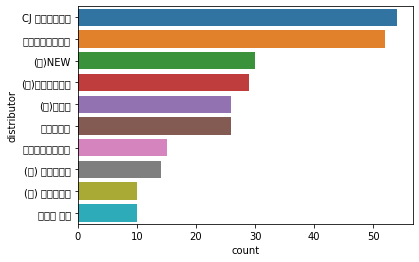

In [16]:
draw_plot('distributor', train_df)

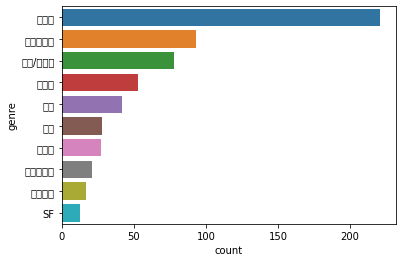

In [17]:
draw_plot('genre', train_df)

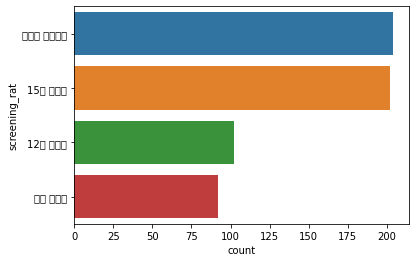

In [18]:
draw_plot('screening_rat', train_df)

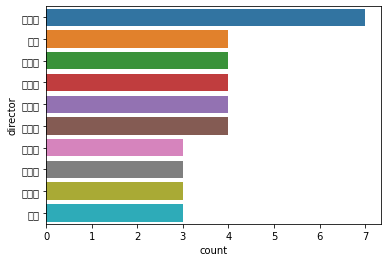

In [19]:
draw_plot('director', train_df)

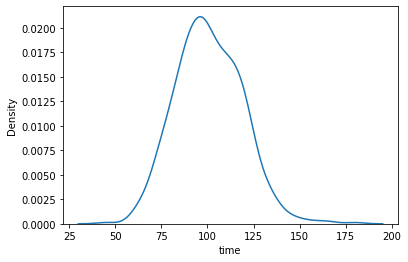

In [20]:
draw_kdeplot('time', train_df)

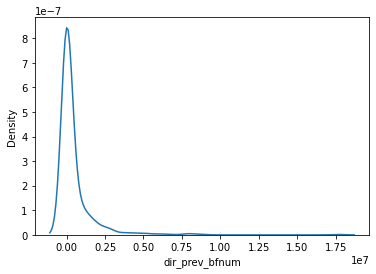

In [21]:
draw_kdeplot('dir_prev_bfnum', train_df)

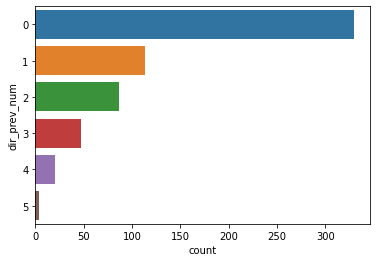

In [22]:
draw_plot('dir_prev_num', train_df)

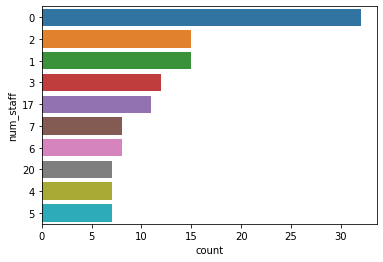

In [23]:
draw_plot('num_staff', train_df)

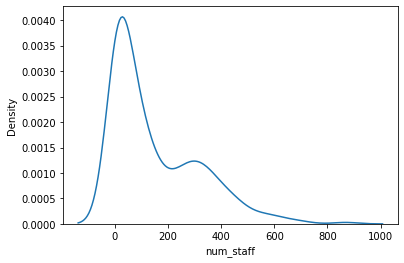

In [24]:
draw_kdeplot('num_staff', train_df)

In [25]:
train_df.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,4.726993e+05,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.309474e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,0.000000e+00,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,3.761416e+05,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


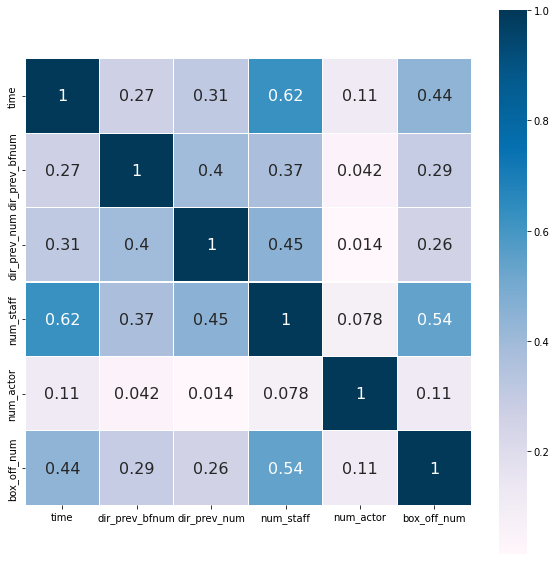

In [26]:
colormap = plt.cm.PuBu

plt.figure(figsize = (10, 10))
numeric_columns = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'box_off_num']
sns.heatmap(train_df[numeric_columns].astype(float).corr(),linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

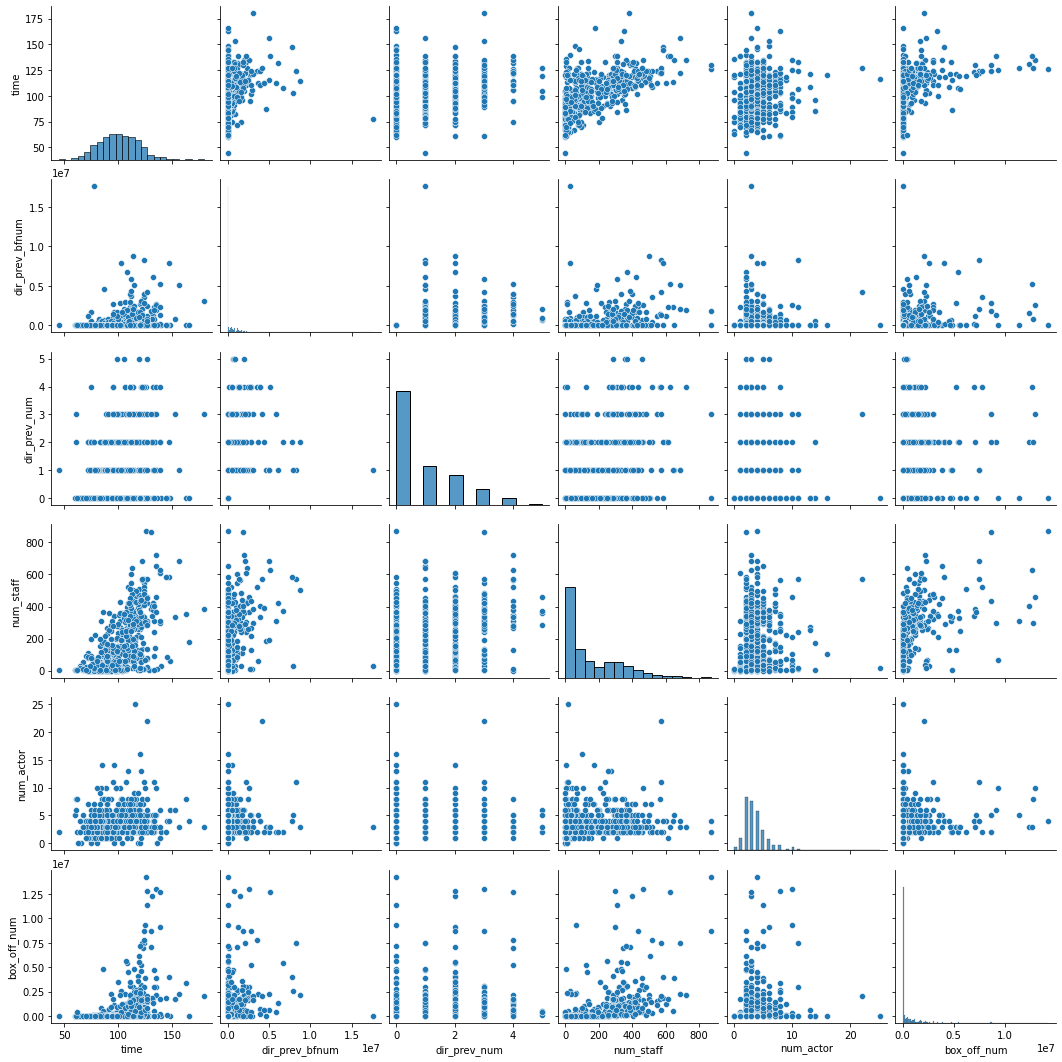

In [27]:
sns.pairplot(train_df[numeric_columns])

In [28]:
train_df[numeric_columns].astype(float).corr()['box_off_num']

time              0.441452
dir_prev_bfnum    0.293791
dir_prev_num      0.259674
num_staff         0.544265
num_actor         0.111179
box_off_num       1.000000
Name: box_off_num, dtype: float64

In [29]:
dataset.drop('title', axis = 1, inplace = True)

In [30]:
train_df.drop('title', axis= 1, inplace = True)
test_df.drop('title', axis = 1, inplace = True)

In [31]:
train_df

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [32]:
train_df.groupby('screening_rat')['box_off_num'].mean()

screening_rat
12세 관람가     8.449809e+05
15세 관람가     1.247519e+06
전체 관람가      1.351005e+05
청소년 관람불가    3.641813e+05
Name: box_off_num, dtype: float64

In [33]:
train_df['year'] = train_df['release_time'].apply(lambda x : x[:4])
test_df['year'] = test_df['release_time'].apply(lambda x : x[:4])
train_df.groupby('year')['box_off_num'].mean()

year
2010    5.416582e+05
2011    6.288671e+05
2012    9.457252e+05
2013    1.007358e+06
2014    5.938845e+05
2015    5.958692e+05
Name: box_off_num, dtype: float64

In [34]:
dataset['year'] = dataset['release_time'].apply(lambda x : x[:4])

In [35]:
train_df.groupby('director')['box_off_num'].mean().sort_values(ascending = False)[:10]

director
윤제균    14262766.0
최동훈    12845252.0
양우석    11374879.0
봉준호     9350351.0
한재림     9135806.0
황동혁     8659725.0
이석훈     8212959.5
김한민     7482180.0
추창민     6986501.0
장철수     6959083.0
Name: box_off_num, dtype: float64

In [36]:
train_df['distributor'].nunique(), train_df['genre'].nunique(), train_df['screening_rat'].nunique(), train_df['director'].nunique()

(169, 12, 4, 472)

In [37]:
dataset['director'].nunique(), train_df['director'].nunique()

(614, 472)

In [38]:
dataset

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398.0,2012
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0,2015
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0,2013
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0,2012
4,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
838,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.00,1,4,4,0.0,2015
839,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,0.00,0,18,2,0.0,2015
840,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,0.00,0,224,4,0.0,2015
841,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.00,1,68,7,0.0,2015


In [39]:
train_df.groupby('genre')['box_off_num'].mean().sort_values(ascending = False)

genre
느와르       2.263695e+06
액션        2.203974e+06
SF        1.788346e+06
코미디       1.193914e+06
드라마       6.256898e+05
공포        5.908325e+05
미스터리      5.275482e+05
멜로/로맨스    4.259680e+05
애니메이션     1.819267e+05
서스펜스      8.261100e+04
다큐멘터리     6.717226e+04
뮤지컬       6.627000e+03
Name: box_off_num, dtype: float64

In [40]:
train_df.groupby('genre')['box_off_num'].mean().sort_values(ascending = False)

genre
느와르       2.263695e+06
액션        2.203974e+06
SF        1.788346e+06
코미디       1.193914e+06
드라마       6.256898e+05
공포        5.908325e+05
미스터리      5.275482e+05
멜로/로맨스    4.259680e+05
애니메이션     1.819267e+05
서스펜스      8.261100e+04
다큐멘터리     6.717226e+04
뮤지컬       6.627000e+03
Name: box_off_num, dtype: float64

In [41]:
train_df.groupby('year')['box_off_num'].mean().sort_values(ascending = False)

year
2013    1.007358e+06
2012    9.457252e+05
2011    6.288671e+05
2015    5.958692e+05
2014    5.938845e+05
2010    5.416582e+05
Name: box_off_num, dtype: float64

In [42]:
train_df.groupby('screening_rat')['box_off_num'].mean().sort_values(ascending = False)

screening_rat
15세 관람가     1.247519e+06
12세 관람가     8.449809e+05
청소년 관람불가    3.641813e+05
전체 관람가      1.351005e+05
Name: box_off_num, dtype: float64

In [43]:
genre_encoding = {'느와르' : 12, '액션' : 11, 'SF' : 10, '코미디' : 9, '드라마' : 8, '공포' : 7, '미스터리' : 6,
                  '멜로/로맨스' : 5, '애니메이션' : 4, '서스펜스' : 3, '다큐멘터리' : 2, '뮤지컬' : 1}

screen_encoding = {'15세 관람가' : 4, '12세 관람가' : 3, '청소년 관람불가' : 2, '전체 관람가' : 1}
year_encoding = {'2013' : 6, '2012' : 5, '2011' : 4, '2015' : 3, '2014' : 2, '2010' : 1}

train_df['장르'] = train_df['genre'].map(genre_encoding)
test_df['장르'] = test_df['genre'].map(genre_encoding)

train_df['이용가능연령대'] = train_df['screening_rat'].map(screen_encoding)
test_df['이용가능연령대'] = test_df['screening_rat'].map(screen_encoding)

train_df['년도'] = train_df['year'].map(year_encoding)
test_df['년도'] = test_df['year'].map(year_encoding)

In [44]:
train_df.drop(['genre', 'screening_rat', 'year', 'release_time', 'distributor', 'director'], axis = 1, inplace = True)
test_df.drop(['genre', 'screening_rat', 'year', 'release_time', 'distributor', 'director'], axis = 1, inplace = True)

train_df.columns, test_df.columns

(Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
        'box_off_num', '장르', '이용가능연령대', '년도'],
       dtype='object'),
 Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
        '장르', '이용가능연령대', '년도'],
       dtype='object'))

In [45]:
np.corrcoef(train_df['num_actor'], train_df['box_off_num'])

array([[1.        , 0.11117934],
       [0.11117934, 1.        ]])

In [46]:
train_df

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,장르,이용가능연령대,년도
0,96,0.00,0,91,2,23398,11,2,5
1,130,1161602.50,2,387,3,7072501,12,2,3
2,123,220775.25,4,343,4,6959083,11,4,6
3,101,23894.00,2,20,6,217866,9,1,5
4,108,1.00,1,251,2,483387,9,4,1
...,...,...,...,...,...,...,...,...,...
595,111,3833.00,1,510,7,1475091,8,2,2
596,127,496061.00,1,286,6,1716438,8,4,6
597,99,0.00,0,123,4,2475,7,2,1
598,102,0.00,0,431,4,2192525,12,4,3


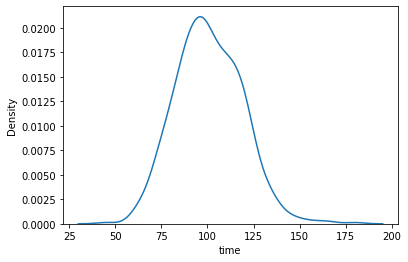

In [47]:
draw_kdeplot('time', train_df)

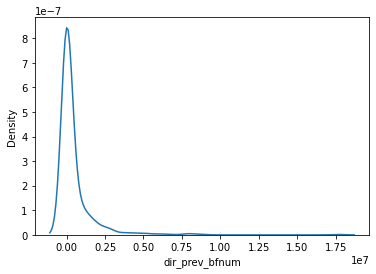

In [48]:
draw_kdeplot('dir_prev_bfnum', train_df)

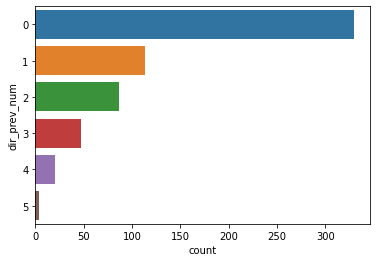

In [49]:
draw_plot('dir_prev_num', train_df)

In [50]:
train_df.loc[train_df['num_actor'] >= 7, 'num_actor'] = 7
train_df['num_actor'].value_counts()

2    154
3    143
4    114
5     58
7     54
1     35
6     33
0      9
Name: num_actor, dtype: int64

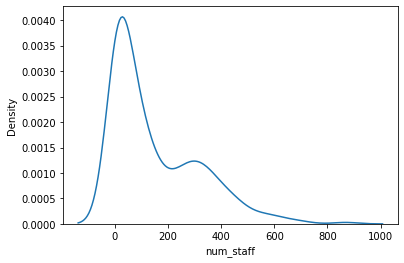

In [51]:
draw_kdeplot('num_staff', train_df)

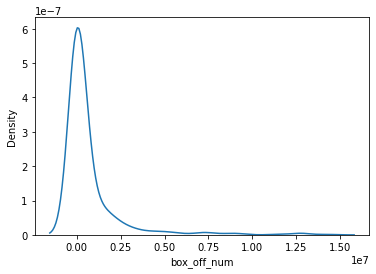

In [54]:
draw_kdeplot('box_off_num', train_df)

In [96]:
X = train_df.copy()
X_test = test_df.copy()

In [97]:
from sklearn.preprocessing import StandardScaler

standard_columns = ['time', 'num_actor', '장르', '이용가능연령대', '년도']
log_columns = ['dir_prev_num', 'dir_prev_bfnum', 'box_off_num', 'num_staff']

scaler = StandardScaler()


X[log_columns] = np.log1p(train_df[log_columns])
X[standard_columns] = scaler.fit_transform(train_df[standard_columns])

X_test[['dir_prev_num', 'dir_prev_bfnum', 'num_staff']] = np.log1p(test_df[['dir_prev_num', 'dir_prev_bfnum', 'num_staff']])
X_test[standard_columns] = scaler.fit_transform(test_df[standard_columns]) 

In [98]:
X_train = X.drop('box_off_num', axis = 1)
y = X['box_off_num']

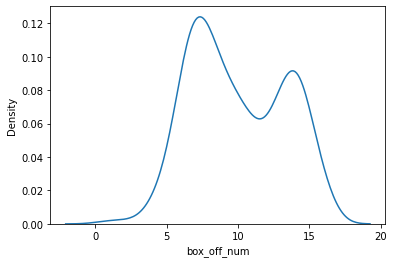

In [58]:
draw_kdeplot('box_off_num', X)

In [61]:
from scipy.stats import skew
print(skew(train_df['num_staff']), skew(X_train['num_staff']))
print(skew(train_df['box_off_num']), skew(y))
print(skew(train_df['dir_prev_num']), skew(X_train['dir_prev_num']))
print(skew(train_df['dir_prev_bfnum']), skew(X_train['dir_prev_bfnum']))
print(skew(train_df['num_staff']), skew(X_train['num_staff']))

1.2303665582484267 -0.704494784252116
4.321279878093952 0.13348854428604476
1.2496276916957825 0.6593151579926931
6.173486868021442 0.46764048431426086
1.2303665582484267 -0.704494784252116


In [62]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [66]:
X_train.shape, X_test.shape, y.shape

((600, 8), (243, 8), (600,))

In [74]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'rmse',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective' : 'regression',
    'verbosity': 1
}

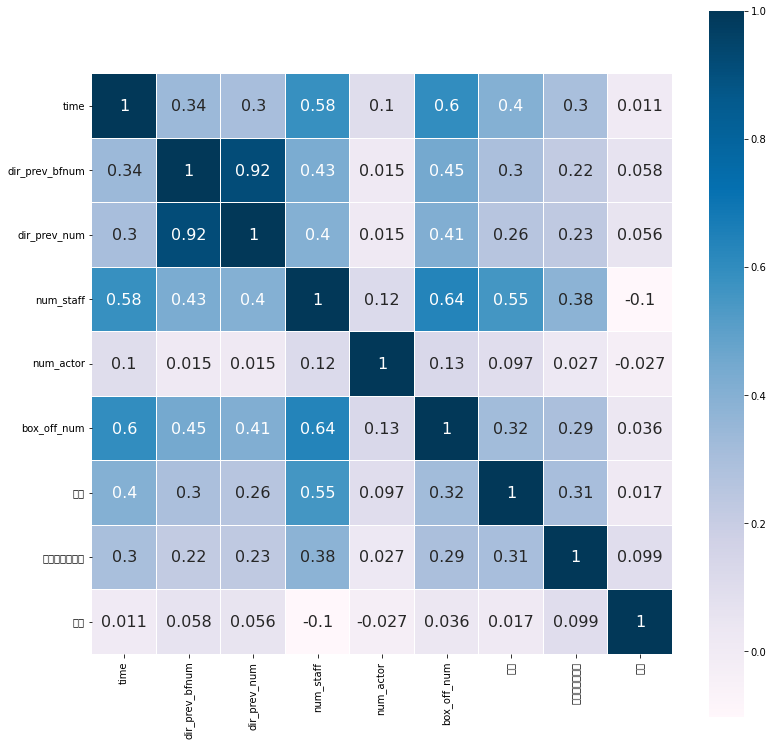

In [89]:
plt.figure(figsize = (13, 13))
sns.heatmap(X.astype(float).corr(),linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


In [92]:
X.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,장르,이용가능연령대,년도
0,-0.268953,0.000000,0.000000,4.521789,-0.875477,10.060449,1.503965,-0.631488,0.961375
1,1.611324,13.965312,1.098612,5.961005,-0.287908,15.771725,1.861201,-0.631488,-0.232880
2,1.224208,12.304905,1.609438,5.840642,0.299660,15.755558,1.503965,1.198912,1.558503
3,0.007558,10.081425,1.098612,3.044522,1.474796,12.291640,0.789492,-1.546688,0.961375
4,0.394674,0.693147,0.693147,5.529429,-0.875477,13.088575,0.789492,1.198912,-1.427135


In [148]:
kf = KFold(n_splits =  10, shuffle = True, random_state = 42)


In [136]:
def LGBMTuning(X_train, X_test, y, n_splits = 10):
    fk = KFold(n_splits = n_splits)
    y_pred = np.zeros(len(X_test))

    # train데이터셋에서 건물의 비율을 동일하게하기 위해 StratifiedKFold 사용
    for fold_, (tr_idx, val_idx) in enumerate(sfk.split(X_train, y)):      
        print("Fold : {}".format(fold_))
        X_tr = X_train.iloc[tr_idx]
        X_val = X_train.iloc[val_idx]
        y_tr = y.iloc[tr_idx]
        y_val = y.iloc[val_idx]

        lgbm = LGBMRegressor(objective='regression',num_leaves=5,max_depth = 12,
                              learning_rate=0.01, n_estimators=2000,
                               min_samples_leaf = 8
                              )
        lgbm.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], eval_metric= 'rmse', early_stopping_rounds = 200,verbose = 100)
        y_pred += np.expm1(lgbm.predict(X_test)) / n_splits

    return y_pred

In [166]:
gbm = GradientBoostingRegressor(n_estimators = 700, min_samples_leaf=  8,
                                max_depth = 12, learning_rate = 0.01, loss = 'squared_error', verbose = 1, random_state = 42)

rmse_list = []
gb_pred = np.zeros((X_test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y) :
    tr_x, tr_y = X_train.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y.iloc[val_idx]
    
    gbm.fit(tr_x, tr_y)
    print('validation loss : ', gbm.score(val_x, val_y))
    pred = np.expm1([0 if x < 0 else x for x in gbm.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in gbm.predict(X_test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    gb_pred += (sub_pred / 10)

      Iter       Train Loss   Remaining Time 
         1          10.8770            1.56s
         2          10.7100            1.87s
         3          10.5462            2.20s
         4          10.3850            2.28s
         5          10.2276            2.69s
         6          10.0726            3.41s
         7           9.9203            3.29s
         8           9.7685            3.19s
         9           9.6202            3.09s
        10           9.4744            3.04s
        20           8.1653            3.05s
        30           7.0858            3.76s
        40           6.1901            3.25s
        50           5.4475            2.99s
        60           4.8266            2.76s
        70           4.3026            2.53s
        80           3.8540            2.35s
        90           3.4745            2.22s
       100           3.1495            2.10s
       200           1.5274            1.45s
       300           0.9654            1.14s
       40

In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.model_selection import StratifiedKFold

n_splits = 10
sfk = KFold(n_splits = n_splits)
y_pred = np.zeros(len(X_test))

# train데이터셋에서 건물의 비율을 동일하게하기 위해 StratifiedKFold 사용
for fold_, (tr_idx, val_idx) in enumerate(sfk.split(X_train, y)):      
    print("Fold : {}".format(fold_))
    X_tr = X_train.iloc[tr_idx]
    X_val = X_train.iloc[val_idx]
    y_tr = y.iloc[tr_idx]
    y_val = y.iloc[val_idx]

    lgbm = LGBMRegressor(n_estimators = 3000, learning_rate= 0.01,objective = 'rmse')
    lgbm.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], eval_metric= 'rmse', early_stopping_rounds = 200,verbose = 100)
    y_pred += np.expm1(lgbm.predict(X_test)) / n_splits

In [121]:
X_train.shape, X_test.shape, y.shape

((600, 8), (243, 8), (600,))

In [ ]:
y_pred = LGBMTuning(X_train, X_test, y)
submission['box_off_num'] = y_pred

In [167]:
submission['box_off_num'] = y_pred * 0.2 + gb_pred * 0.8
submission

,title,box_off_num
0,용서는 없다,577392.579275
1,아빠가 여자를 좋아해,376019.217449
2,하모니,526007.050220
3,의형제,779937.556113
4,평행 이론,617988.557862
...,...,...
238,해에게서 소년에게,479.384613
239,울보 권투부,2938.592303
240,어떤살인,60729.679032
241,말하지 못한 비밀,3309.869674


In [132]:
submission

,title,box_off_num
0,용서는 없다,309190.725948
1,아빠가 여자를 좋아해,302389.741969
2,하모니,483271.789807
3,의형제,424308.409052
4,평행 이론,595063.441879
...,...,...
238,해에게서 소년에게,758.337502
239,울보 권투부,2987.787554
240,어떤살인,36330.961422
241,말하지 못한 비밀,2984.068749


In [82]:
submission['box_off_num'] = y_pred

In [83]:
submission

,title,box_off_num
0,용서는 없다,378747.539520
1,아빠가 여자를 좋아해,353458.156948
2,하모니,399359.616728
3,의형제,697658.928564
4,평행 이론,598858.593748
...,...,...
238,해에게서 소년에게,473.319677
239,울보 권투부,3946.573882
240,어떤살인,73876.850510
241,말하지 못한 비밀,2590.098853


In [168]:
submission.to_csv('/content/drive/MyDrive/submission.csv', index = False)
